In [49]:
import pandas as pd 
from sqlalchemy import create_engine

import os
from dotenv import load_dotenv
from sqlalchemy import create_engine
from urllib.parse import quote_plus

load_dotenv()

DB_USER = os.getenv("DB_USER")
DB_PASSWORD = quote_plus(os.getenv("DB_PASSWORD"))
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")

engine = create_engine(
    f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
)

query = "SELECT * FROM modeling_dataset;"
df = pd.read_sql(query, engine)


In [50]:
# Get an overview of the Data
df.describe()

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,total_prior_visits,readmitted_binary
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607,1.202759,0.111599
std,1.026403e+08,3.869636e+07,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600,2.291781,0.314874
min,1.252200e+04,1.350000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,8.496119e+07,2.341322e+07,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000
50%,1.523890e+08,4.550514e+07,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000
75%,2.302709e+08,8.754595e+07,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,2.000000,0.000000
max,4.438672e+08,1.895026e+08,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,80.000000,1.000000


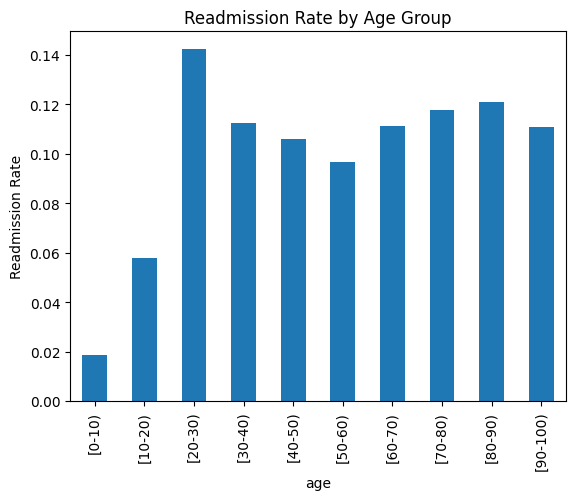

In [51]:
# Plot the Readmission Rate by Age
import matplotlib.pyplot as plt

age_readmit = (
    df.groupby('age')['readmitted_binary']
    .mean()
    .sort_index()
)

plt.figure()
age_readmit.plot(kind='bar')
plt.ylabel("Readmission Rate")
plt.title("Readmission Rate by Age Group")
plt.show()

Readmission rates increase substantially after early adulthood, peaking in the 20–30 age group (≈14%) before stabilizing between 10–12% across older age brackets. Pediatric patients show the lowest risk (<2%). While age contributes to risk, it does not appear to be the strongest standalone driver compared to utilization history.

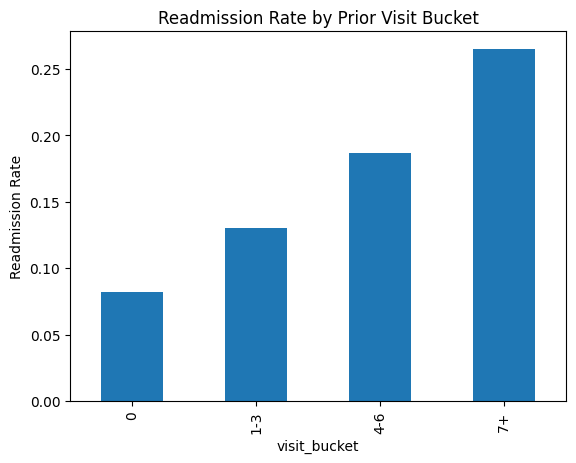

In [52]:
# Plot Prior Visits vs Readmissions 
visit_readmit = (
    df.groupby('visit_bucket')['readmitted_binary']
    .mean()
    .sort_index()
)

plt.figure()
visit_readmit.plot(kind='bar')
plt.ylabel("Readmission Rate")
plt.title("Readmission Rate by Prior Visit Bucket")
plt.show()

Readmission risk increases sharply with prior healthcare utilization. Patients with no prior visits have an 8% readmission rate, while those with 7+ prior visits face a 26% rate — more than triple the baseline risk. Prior visit frequency is the strongest observable predictor of 30-day readmission.

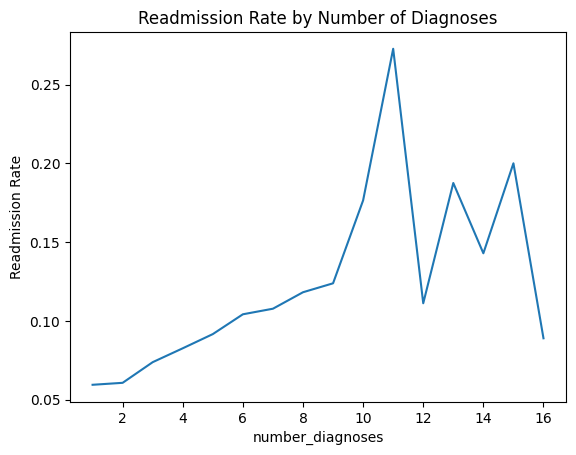

In [53]:
diag_readmit = (
    df.groupby('number_diagnoses')['readmitted_binary']
    .mean()
)

plt.figure()
diag_readmit.plot()
plt.ylabel("Readmission Rate")
plt.title("Readmission Rate by Number of Diagnoses")
plt.show()

Readmission risk rises steadily as the number of diagnoses increases, suggesting that medical complexity is strongly associated with 30-day readmission. Rates climb gradually up to 10 diagnoses, after which volatility appears — likely due to smaller sample sizes in higher diagnosis counts. Overall, greater comorbidity burden correlates with higher readmission risk.

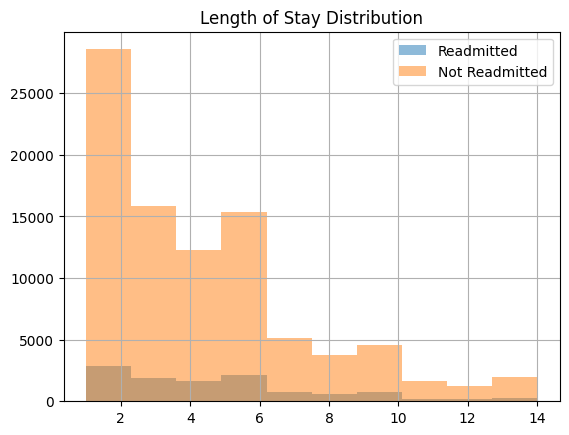

In [54]:
plt.figure()
df[df['readmitted_binary']==1]['time_in_hospital'].hist(alpha=0.5)
df[df['readmitted_binary']==0]['time_in_hospital'].hist(alpha=0.5)
plt.legend(["Readmitted", "Not Readmitted"])
plt.title("Length of Stay Distribution")
plt.show()

Longer hospital stays may be associated with a somewhat higher likelihood of readmission, but the strong overlap indicates other clinical or demographic factors likely play an important role. Other Factors such as Prior visits, diagnoses, and age have more of an impact on readmission. 